# **Project Fundamentals of AIML: Cardio Good Fitness Data Analysis**
**Marks: 40**

## **Context**

Cardio Good Fitness is a leading manufacturer of high-quality treadmills. The company offers three main products: the TM195, the TM498, and the TM798, which is their flagship product. With the rising demand for fitness in the market and an increasing number of competitors, Cardio Good Fitness wants to gain a better understanding of its existing customer profiles in order to develop more targeted marketing and product development strategies. They believe this will allow them to meet the needs and preferences of their customers, increase customer satisfaction, and drive revenue growth.

<br>

## **Objective**

In order to gain insights into its customer profiles, Cardio Good Fitness has collected demographic and product usage information for each of its customers. The dataset includes variables such as age, gender, income, and miles run on the treadmill for each of the three products.

Suppose you are hired as a Data Scientist in this company and the Data Science team has shared the data with you. The requirement is to analyze the data and identify patterns in product usage and the key characteristics of customers by conducting exploratory data analysis (EDA) to come up with customer profiles.

The goal is to answer key questions such as:

* What are the key characteristics of customers who purchase each product?
* How does product usage vary by each group?

<br>

## **Data Description**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-


* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. number of times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### Let us start by importing the required libraries - 

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
cardio = df.copy()

In [5]:
# returns the first 5 rows
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the product purchased by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Check the shapes of the dataset
cardio.shape

(180, 9)

#### Observations:
There are 180 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations:
There are 6 numerical columns in the data and 3 objects.

### **Question 3:** Write a code to convert the data type of the object type variables to the 'categorical' type to reduce memory usage. [0.5 mark]


In [8]:
# Changing data types to category
cardio['Product'] = cardio['Product'].astype('category')
cardio['Gender'] = cardio['Gender'].astype('category')
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype('category')

In [9]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### **Question 4:** Are there any missing values in the data? If yes, treat them using an appropriate method. [0.5 mark]

In [10]:
# Check for missing values in the data
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Observations:
There are no missing values in the data

### **Question 5:** Check the statistical summary of the data. Which product type has had the highest number of sales? [1 marks]

In [11]:
# Check the summary statistics of the numerical data
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Observations:
* `Age`: The average age of an customer is 29. 75% of the customers are between the ages of 18 and 33. There are some customers at the age of 50.
* `Education`: On average customers are 15.57 years educated, while the median number of years educated is 16. 
* `Usage`: On average customers want to use the treadmill 3 times per week.
* `Fitness`: The average fitness rating for a customer is 3. 75% of customers have a fitness rating of less than or equal to 4. 
* `Income`: On average the income for a customer is $53,719. There's a huge difference between the max and 75th percentile of the data which indicates that there might be some outliers present in this column. 
* `Miles`: On average customers expect to run 103 miles, while the median is 94 miles. There's a huge difference between the max and 75th percentile of the data which indicates that there might be some outliers present in this column.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [6 marks]

In [12]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

## **Explore Numerical Variables**

#### **Observations on Age**

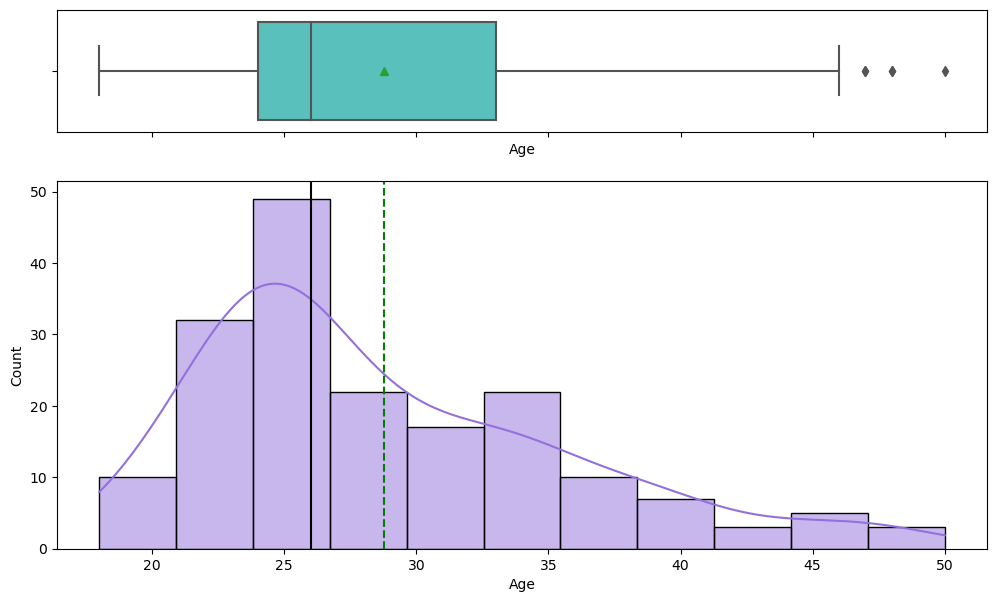

In [13]:
histogram_boxplot(cardio, 'Age', figsize=(12, 7), kde=True)

#### Observations: 
* The distribution of the age of customers is slightly right skewed
* There are a few outliers to the right
* 50% of the customers are less than or equal to the age 26

#### **Observations on Education**

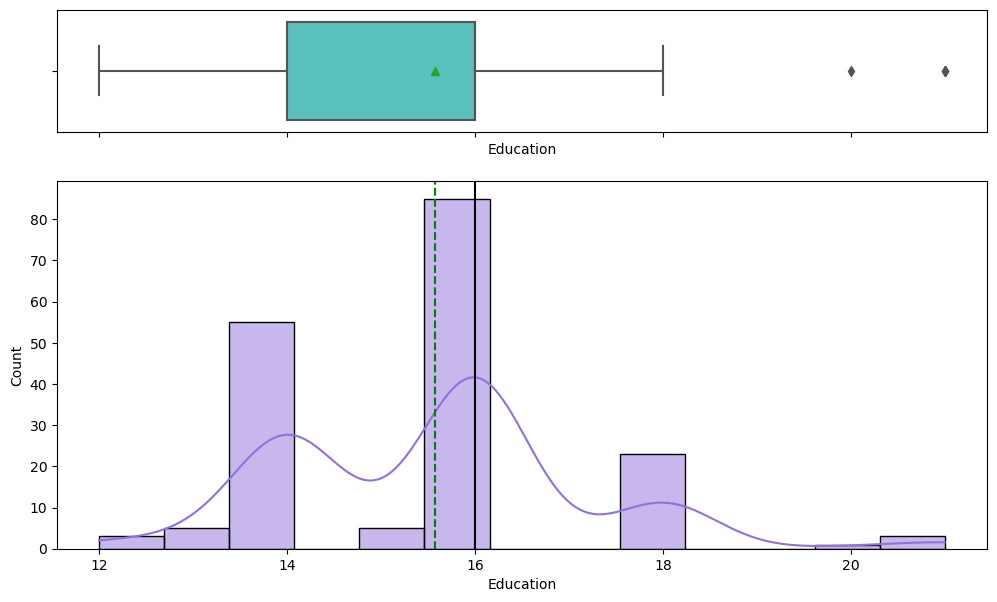

In [14]:
histogram_boxplot(cardio, 'Education', figsize=(12, 7), kde=True)

#### Observations: 
* On average customers have 16 years of education.
* There are a few outliers to the right
* The highest number of years of education is 21, while the lowest is 12. 
* The distribution is close to a normal distribution

#### **Observations on Usage**

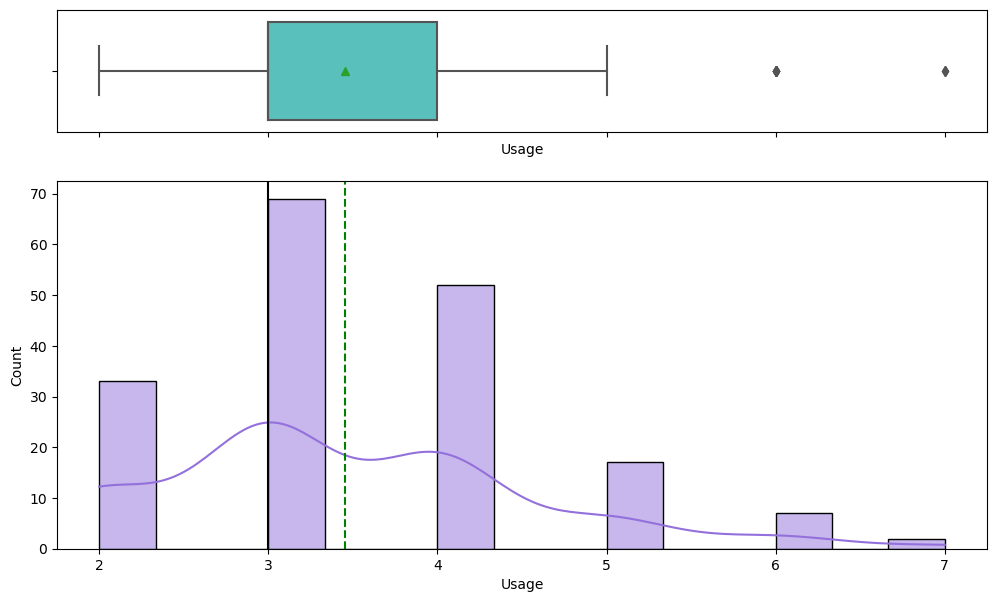

In [15]:
histogram_boxplot(cardio, 'Usage', figsize=(12, 7), kde=True)

#### Observations: 
* Most of the customers want to use the treadmill 3 to 4 times per week.
* The distribution is slightly right skewed. 
* There are a few outliers to the right

#### **Observations on Fitness**

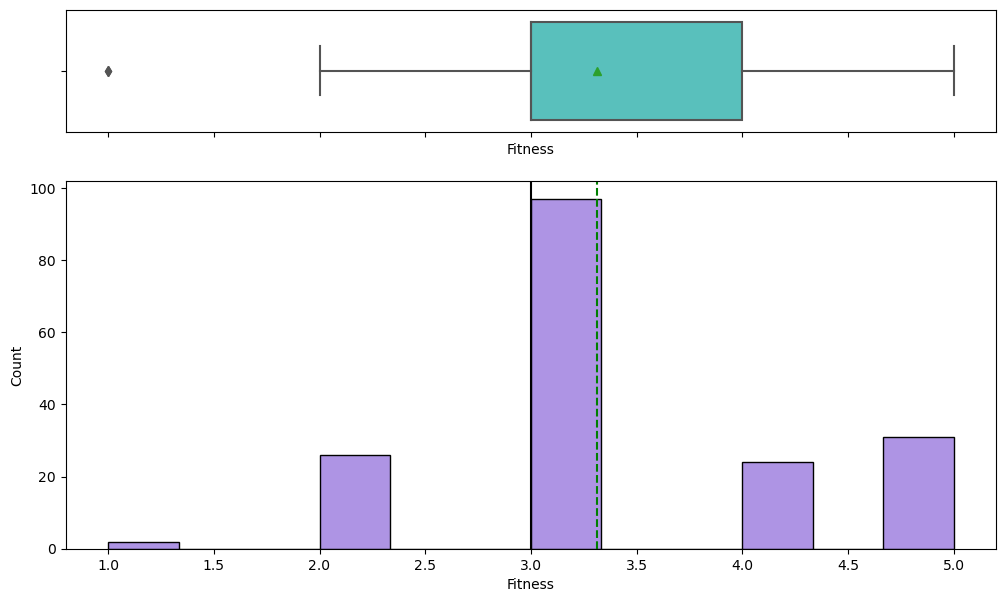

In [16]:
histogram_boxplot(cardio, 'Fitness')

#### Observations: 
* Most customers give themself a fitness rating of 3. 
* The lowest fitness rating is 1 and it's an outlier.
* 75% of customer give themself a rating between 2 and 4. 
* This is a normal distribution

#### **Observations on Income**

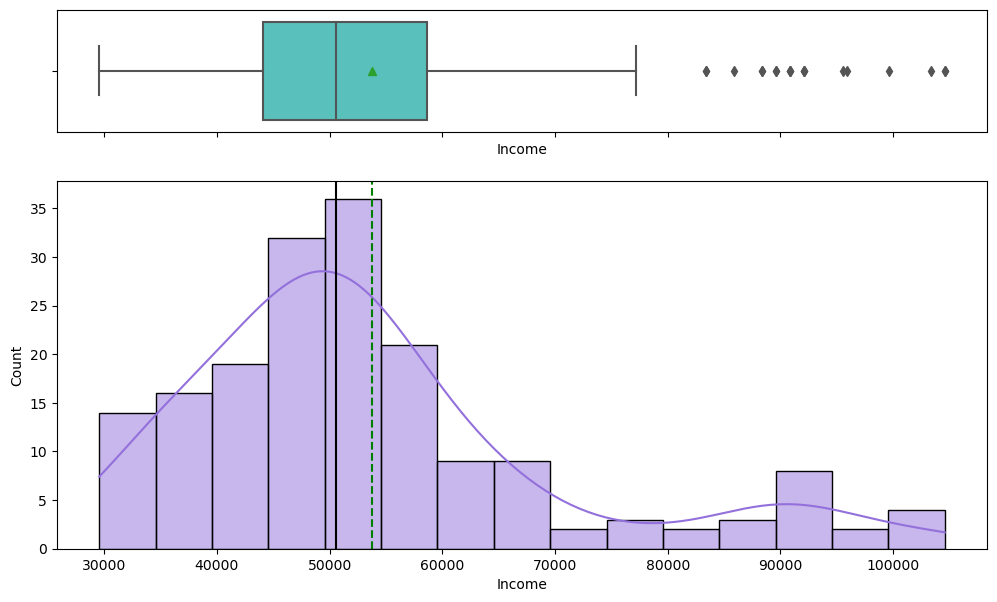

In [17]:
histogram_boxplot(cardio, 'Income', figsize=(12, 7), kde=True)

#### Observations: 
* The distribution of income is normally distributed
* 50% of customers have a income between 29,000 and 50,000
* There are many outliers on the far right end

#### **Observations on Miles**

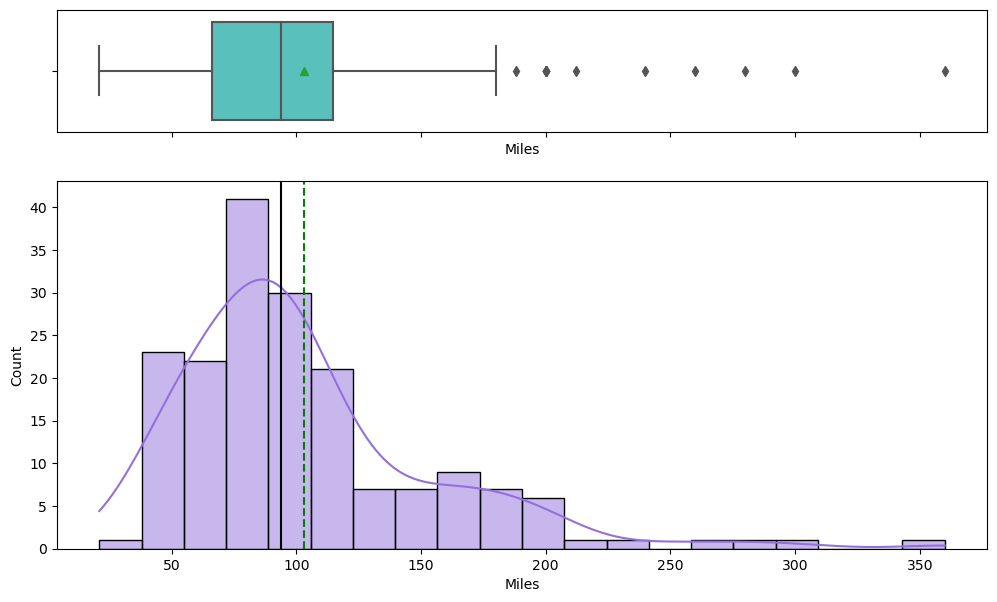

In [18]:
histogram_boxplot(cardio, 'Miles', figsize=(12, 7), kde=True)

#### Observations: 
* The distribution is right skewed
* There are many outliers on the far right
* 50% of customers plan to run between 21 and 94 miles

## **Explore Categorical Variables**

Observations on Product

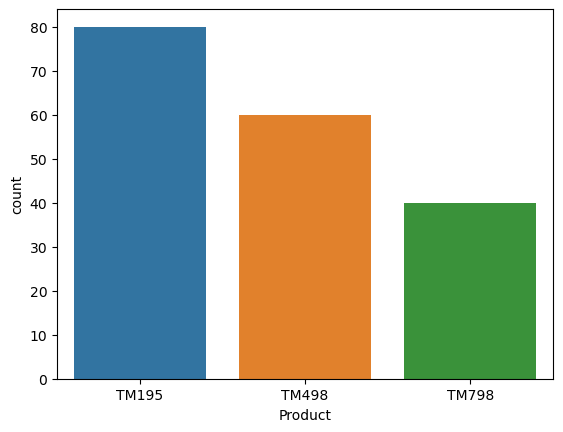

In [19]:
sns.countplot(data=cardio, x='Product');

#### Observations: 
* Customers purchased the TM195 treadmill the most
* Customers purchased the TM798 treadmill the least

Observations on Usage

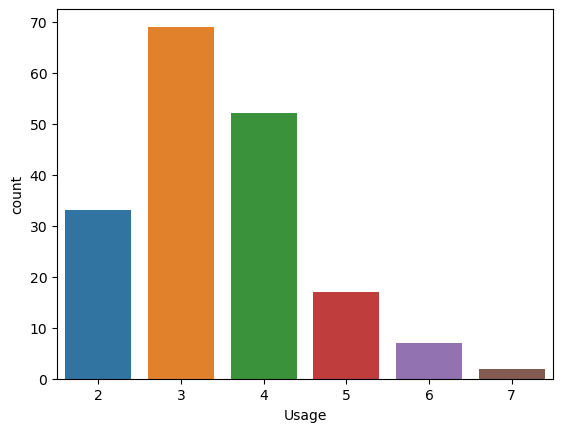

In [20]:
sns.countplot(data=cardio, x='Usage');

#### Observations: 
* The average amount of times customers want to use the treadmill the most per week is 3
* The average amount of times customers want to use the treadmill the least per week is 7

Observations on Fitness

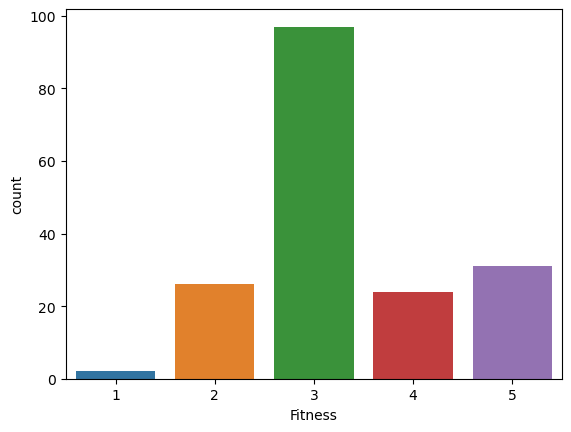

In [21]:
sns.countplot(data=cardio, x='Fitness');

#### Observations: 
* Customers who purchase treadmills the most have a fitness rating of 3
* Customers who purchase treadmills the least amount of times have a fitness rating of 1

Observations on Education

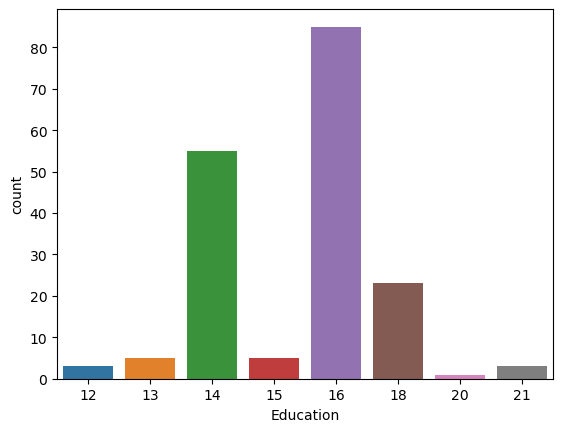

In [22]:
sns.countplot(data=cardio, x='Education');

#### Observations: 
* Customers who purchase treadmills the most have an education of 16 years
* Customers who purchase treadmills the least have an education of 20 years

### **Bivariate and Multivariate Analysis**

### **Question 7:** Perform bivariate and multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [12 marks]

#### **Bivariate Analysis**

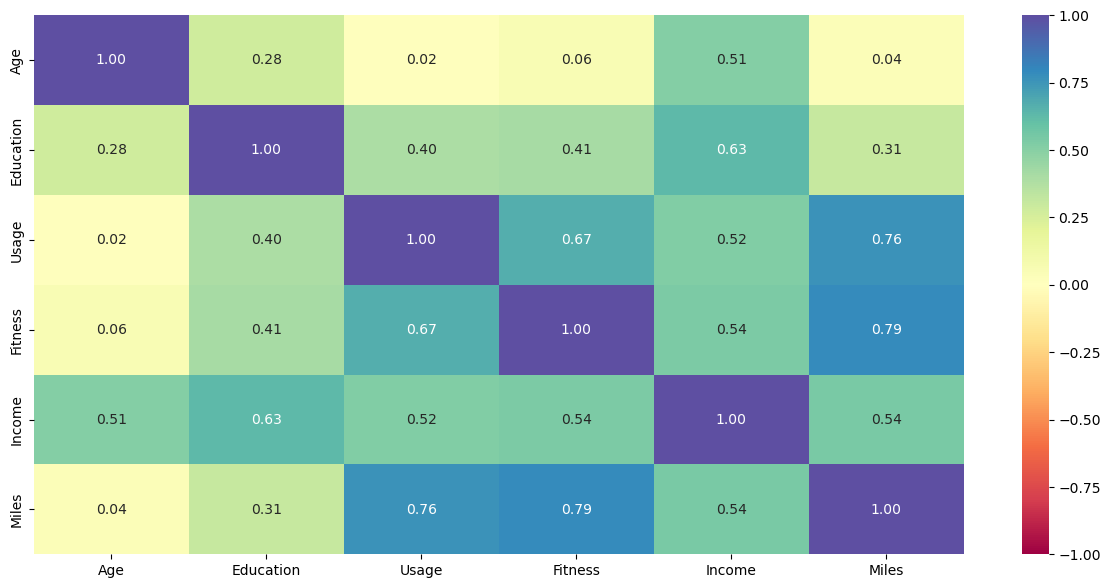

In [23]:
# Check for correlation between all the numerical variables
num_var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
corr = cardio[num_var].corr()

# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations: 
* Positive correlation between Fitness and Miles.
* Usage and miles share positive correlation.
* Fitness shows positive correlation with Usage.
* There appears to be low correlation from usage, fitness, and miles with age. 
* Age and income share positive correlation.
* Nothing is negatively correlated with the data.

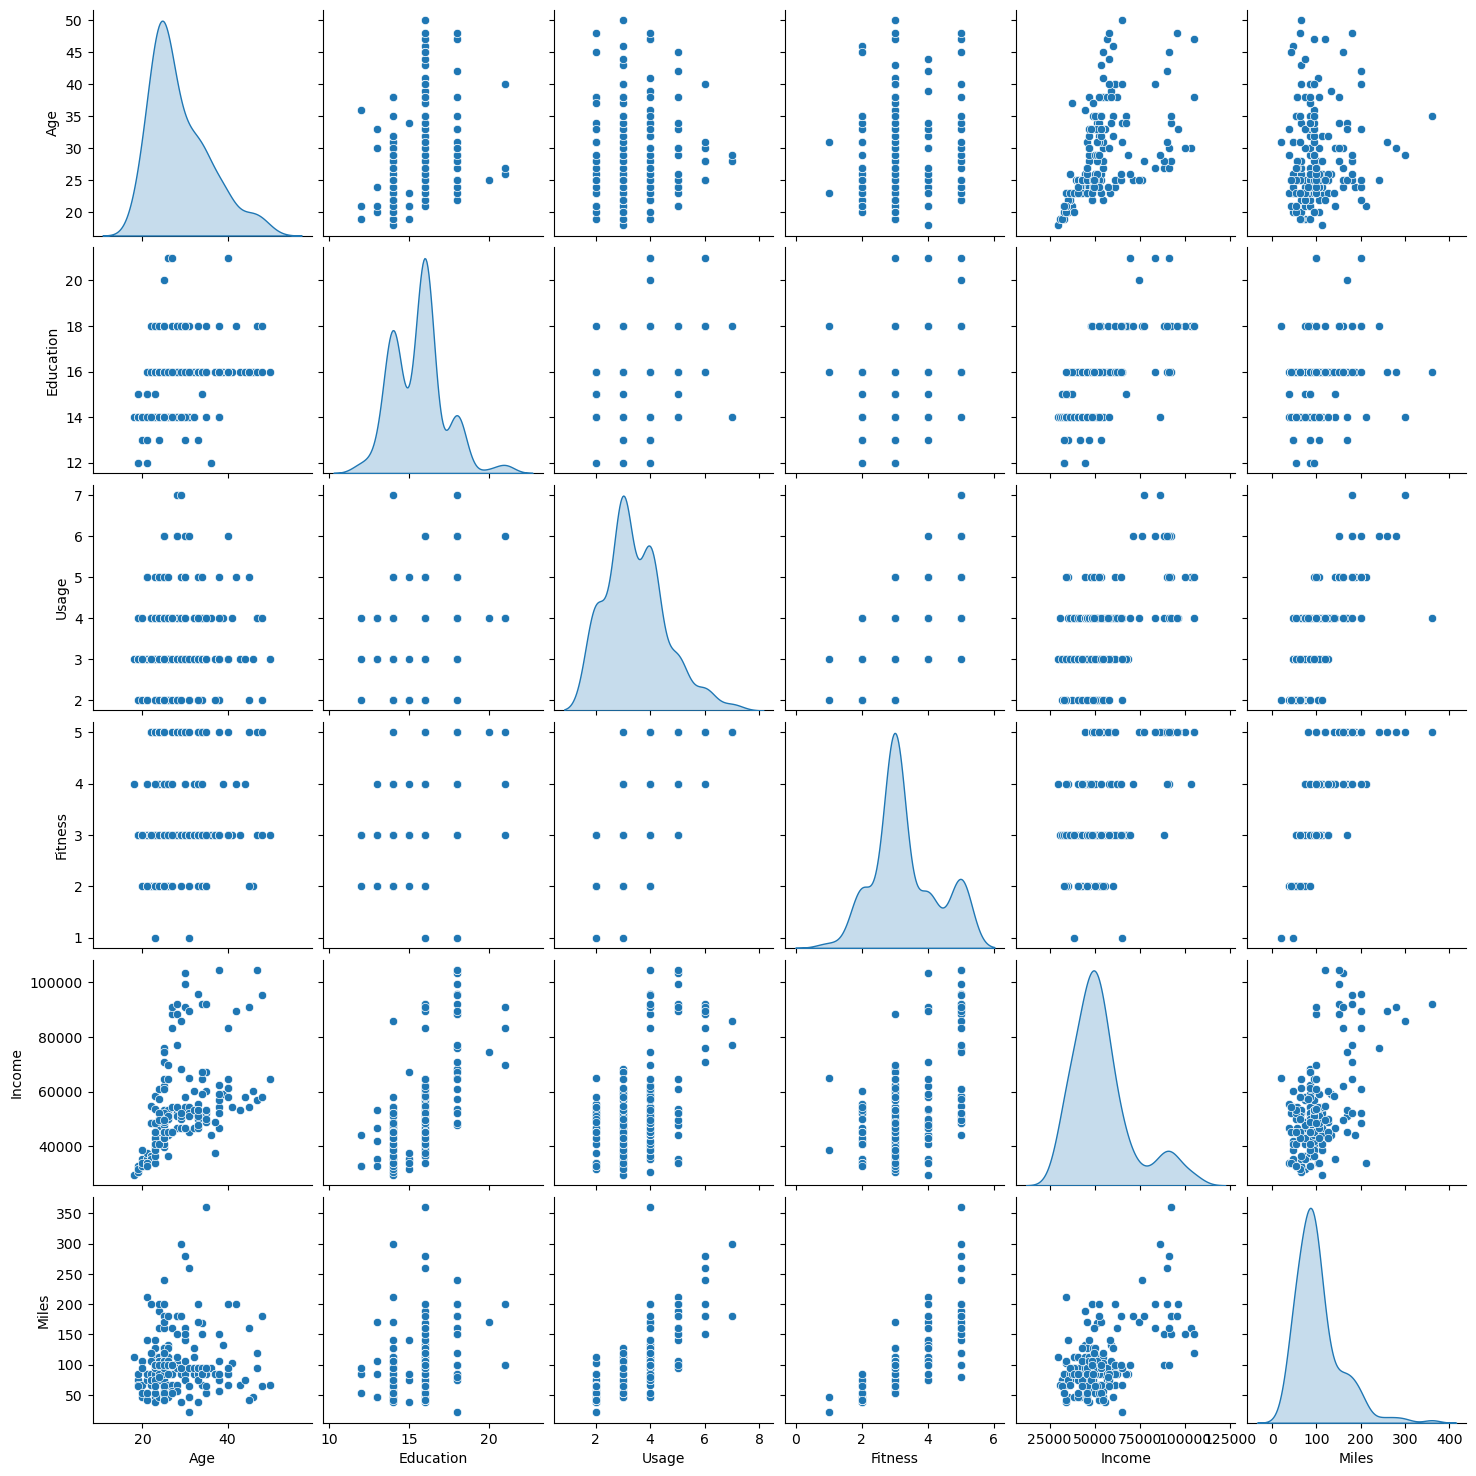

In [24]:
sns.pairplot(data=cardio[num_var], diag_kind="kde")
plt.show()

#### Observations: 
* The insights gathered from the correlation plot is similar to this scatter plot.
* There is no negative correlation in the data.

#### **Product by Gender**

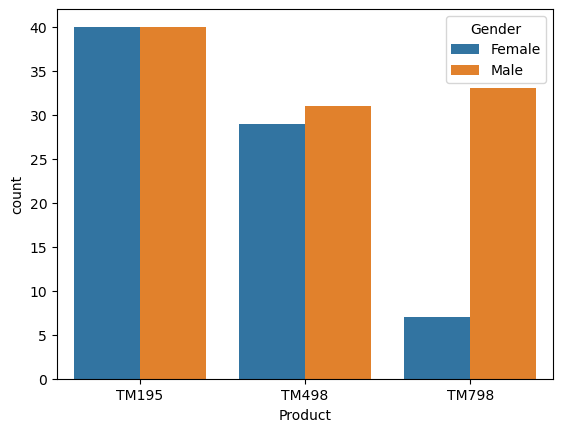

In [25]:
sns.countplot(data=cardio, x='Product', hue='Gender');

#### Observations: 
* Males purchased treadmills more than the females
* TM195 purchases were the same amount for both male and females
* Females bought very few TM798 treadmills
* TM195 treadmills were purchased the most by male and females
* There was a drastic difference in the amount of TM798 purchased by males compared to females

#### **Product by Marital Status**

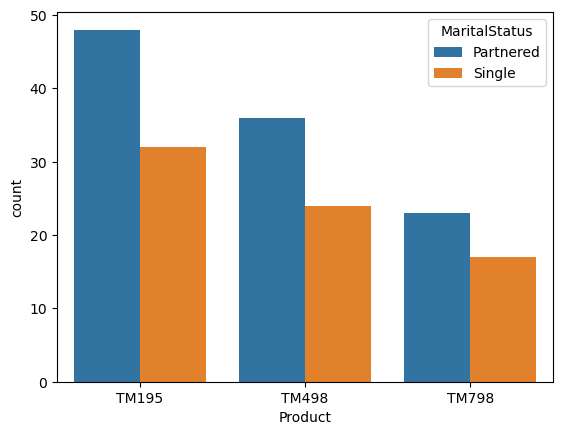

In [26]:
sns.countplot(data=cardio, x='Product', hue='MaritalStatus');

#### Observations: 
* Customers who have a partner bought each product more than single customers
* Customers who have a partner bought the TM195 product more than any other product
* Single customers bought the least amount of treadmills
* Both single customers and customers with partners bought the TM195 product the most
* Both single customers and customers with partners bought the TM798 product the least

#### **Product by Fitness**

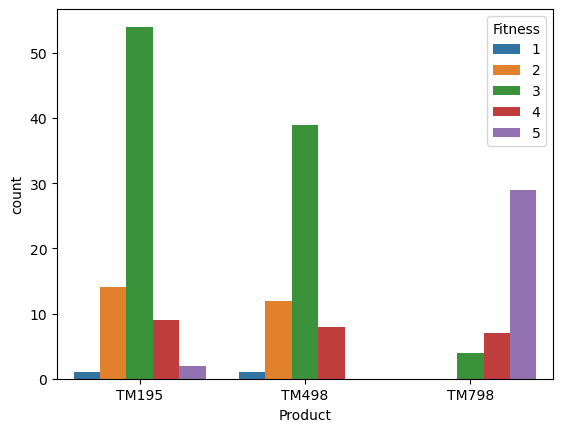

In [27]:
sns.countplot(data=cardio, x='Product', hue='Fitness');

#### Observations: 
* Customers with a Fitness rating of 3 purchased the most TM195 products.
* Customers with a Fitness rating of 3 purchased the most TM498 products.
* Customers with a Fitness rating of 1 purchased the least amount of products.
* Customers with a Fitness rating of 5 purchased the most TM798 products.
* The TM195 has the most amount of purchases from customers across every Fitness rating.
* The TM798 has the least amount of purchases form customers across every Fitness rating.

#### **Product by Income**

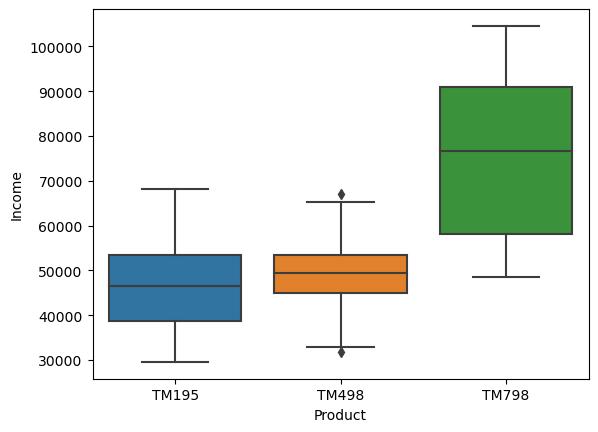

In [28]:
sns.boxplot(data=cardio, x=cardio['Product'], y=cardio['Income']);

#### Observations: 
* High income customers prefer to purchase the TM798 product more than any other product.
* The TM978 has the greatest customer income range of 50,000 to 105,000.
* Low income customers prefer to purchase the TM195 product.
* The TM498 product is the least bought product for low income customers.
* There are a few outliers in customer income for TM498 purchases.

#### **Product by Age**

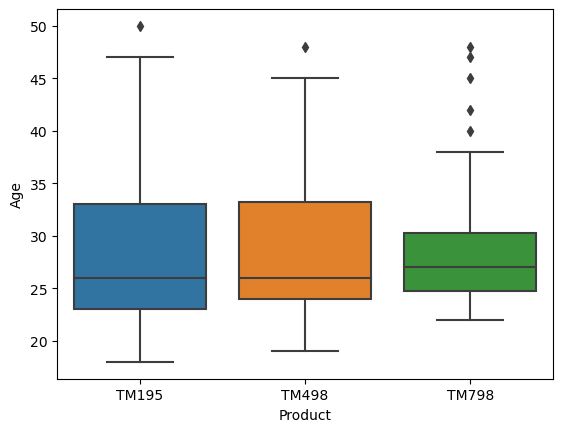

In [29]:
sns.boxplot(data=cardio, x=cardio['Product'], y=cardio['Age']);

#### Observations: 
* Customers of all ages purchased the TM195 and TM498 products the most.
* TM195 and TM498 share the same median of age 26 for customers that purchases the products.
* The TM195 product has the longest range of customer ages which is between 18 and 47.
* Customers between the ages of 23 and 36 purchased the TM798 product the least.
* Out of all of the products the TM798 has the most outliers in terms of customer age.

#### **Product by Education**

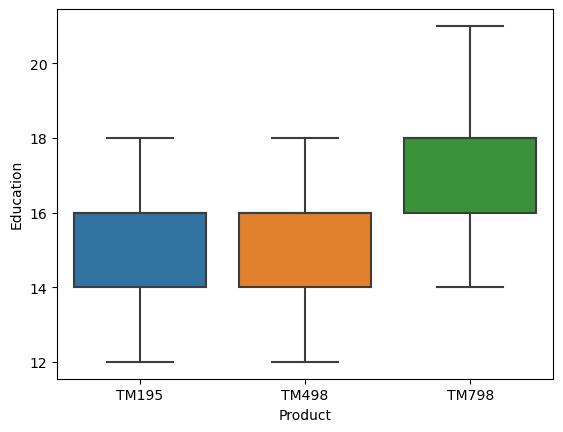

In [30]:
sns.boxplot(data=cardio, x=cardio['Product'], y=cardio['Education']);

#### Observations: 
* Customers who have an education between 12 and 18 bought the same amount of TM195 and TM498 products.
* The TM798 is slightly right skewed for customers educated between the years of 14 and 21. 
* There are no outliers in the data.

#### **Product by Miles**

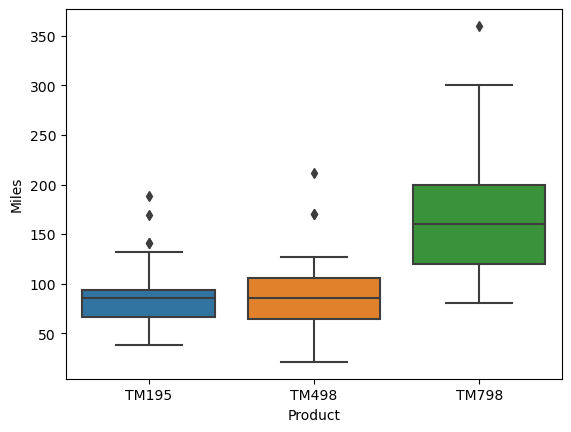

In [31]:
sns.boxplot(data=cardio, x=cardio['Product'], y=cardio['Miles']);

#### Observations: 
* Customers who expect to run the most miles purchased the TM798. 
* The TM195 and TM498 share the same median for miles customers expect to run.
* TM195 has the most outliers, while the TM798 has the least.

#### **Product by Usage**

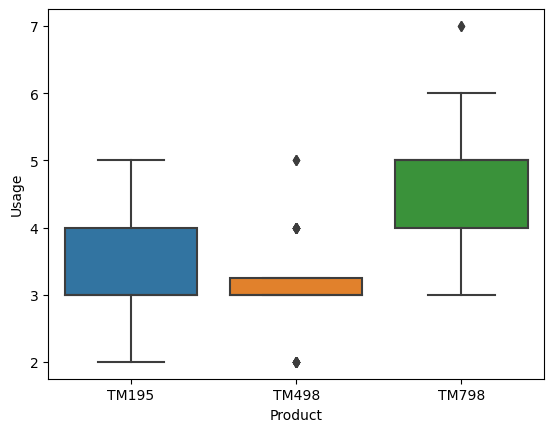

In [32]:
sns.boxplot(data=cardio, x=cardio['Product'], y=cardio['Usage']);

#### Observations: 
* TM195 has a customer usage range between 2 and 5, while the TM798 has a range between 3 and 6.
* TM498 has the least amount of usage for customers.
* TM498 have several outliers for customer usage.

### **Multivariate Analysis**

This will help us understand the needs of our customers based on their key characteristics.

#### Income vs Miles vs Product

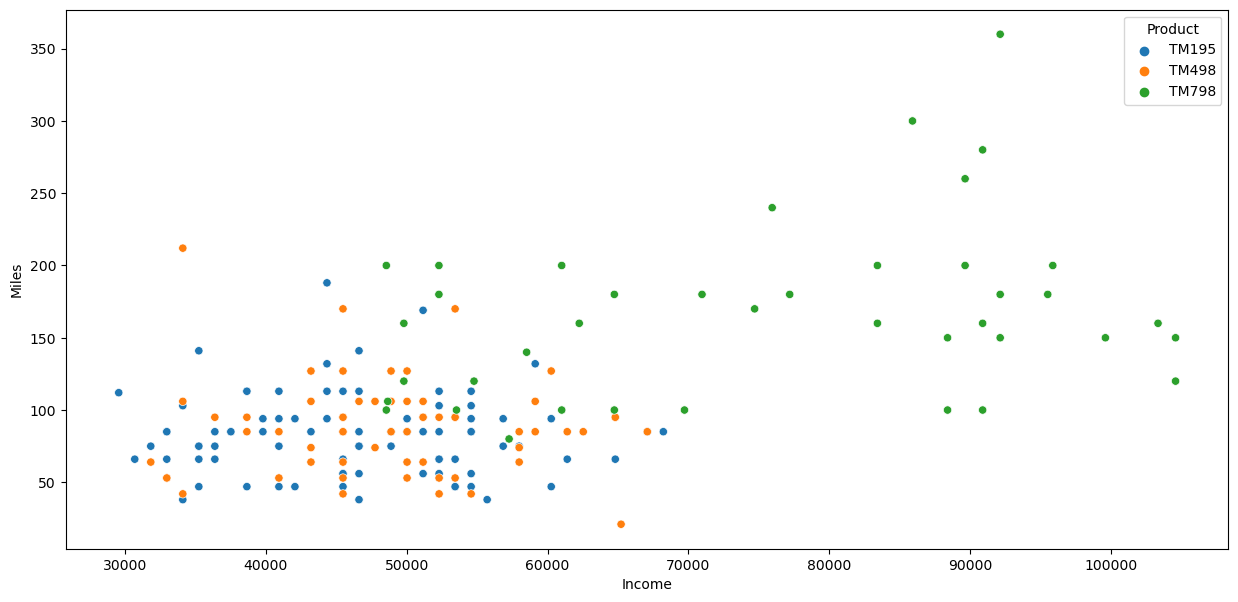

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Product"])
plt.show()

#### Observations: 
* There appears to be positive correlation between income and miles for TM798 products.
* TM798 products have a few outliers 
* Both TM195 and TM498 share a neutral correlation with income and miles.

#### Income vs Miles vs Education

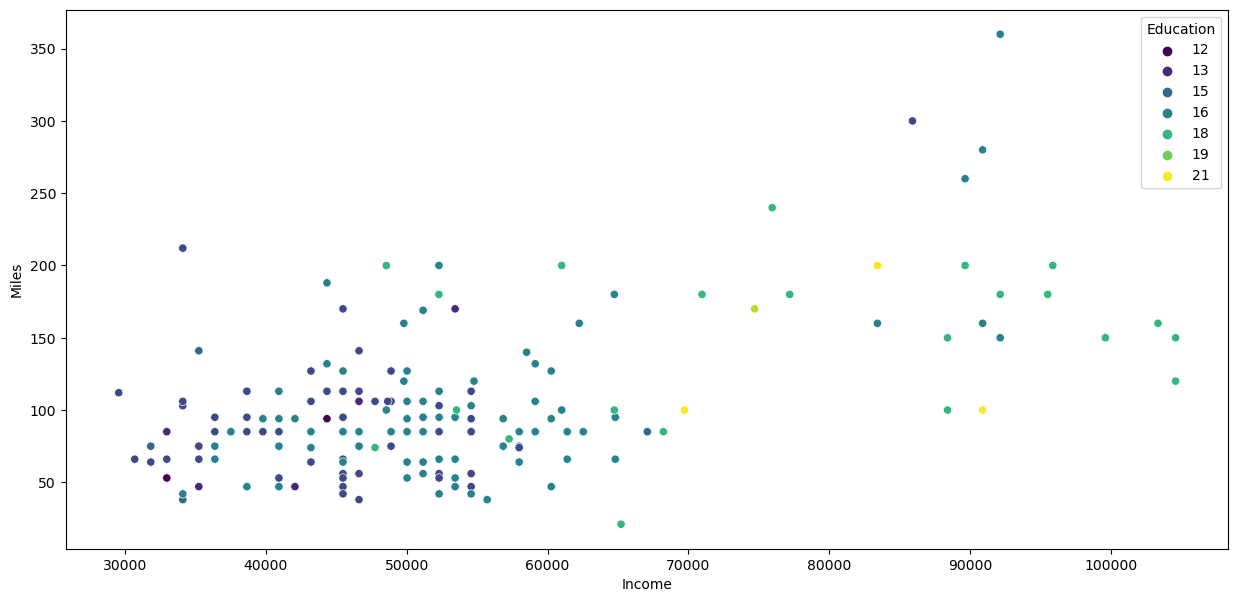

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Education"],palette="viridis")
plt.show()

#### Observations: 
* There's a few outliers in the data for customers who have 16 years of education. 
* There's many outliers in the data for customers with 18 years of education.
* Customers with an education of years between 12 and 16 share a positive correlation between income and miles.

#### Usage vs Gender vs Marital Status

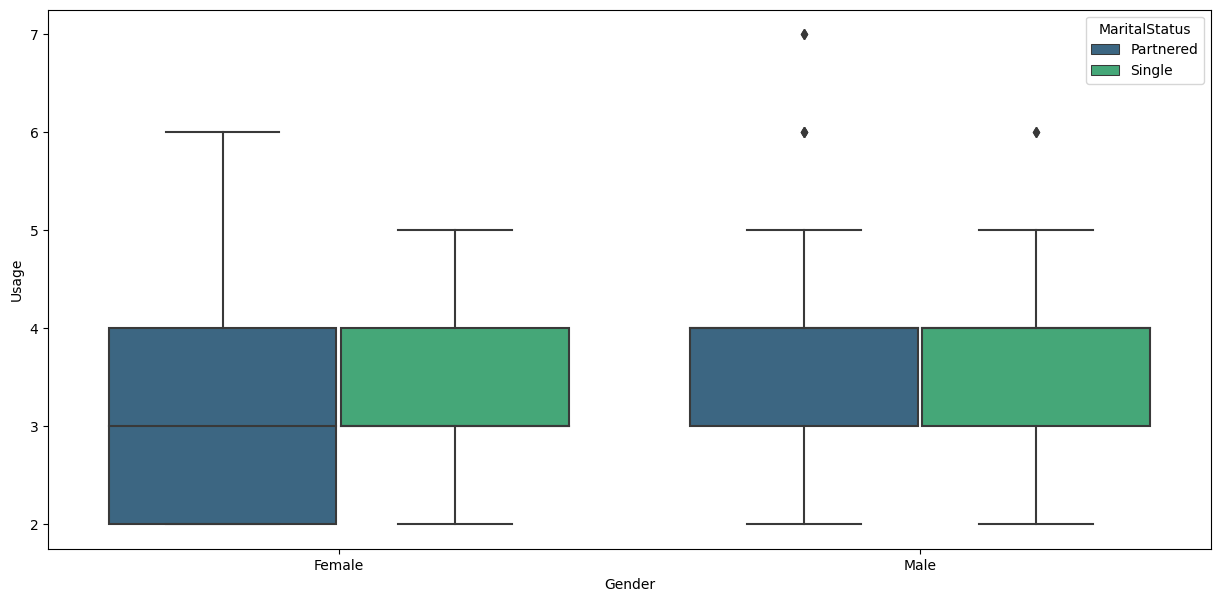

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio, x = cardio["Gender"], y = cardio["Usage"],hue=cardio["MaritalStatus"], palette="viridis")
plt.show()

#### Observations: 
* Female customers who have a partnered marital status have a higher usage than single females and single/partnered males.
* Single female customers and single/partnered males have an identical usage range between 2 and 5. 
* The usage of partnered females is extremely right skewed. 
* 50% of the data for partnered females is between the range of 2 and 4, while single females is between 3 and 4.
* 50% of the data for both partnered and single males are between the range of 3 and 4. 

#### **Miles vs Gender vs Marital Status**

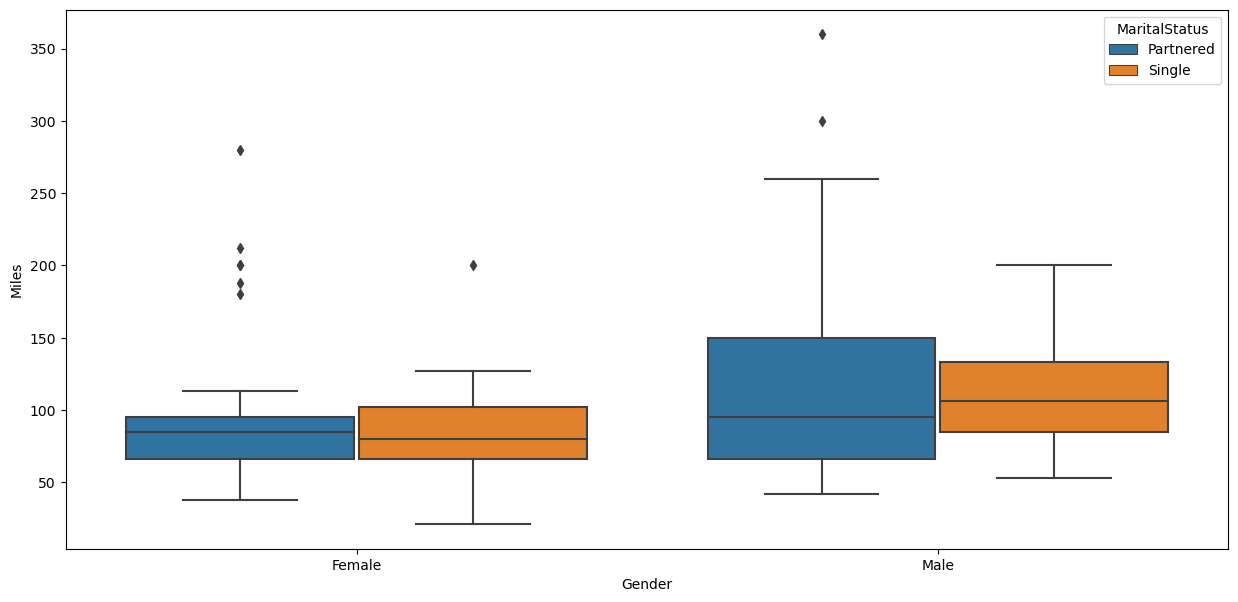

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio, x=cardio["Gender"], y=cardio["Miles"], hue=cardio["MaritalStatus"]);
plt.show()

#### Observations: 
* There are several outliers in the data for partnered females. 
* Partnered males is right skewed for the miles that they expect to run.
* Partnered males have the longest range for miles expected to run which is between 40 and 260. 
* Partnered females have the shortest range for miles expected to run which is between 40 and 110.
* Single males expect to run more miles than single females.
* Partnered males expect to run more miles than partnered females. 
* Single females expect to run slightly more than partnered females.

#### **Gender vs Income vs Marital Status**

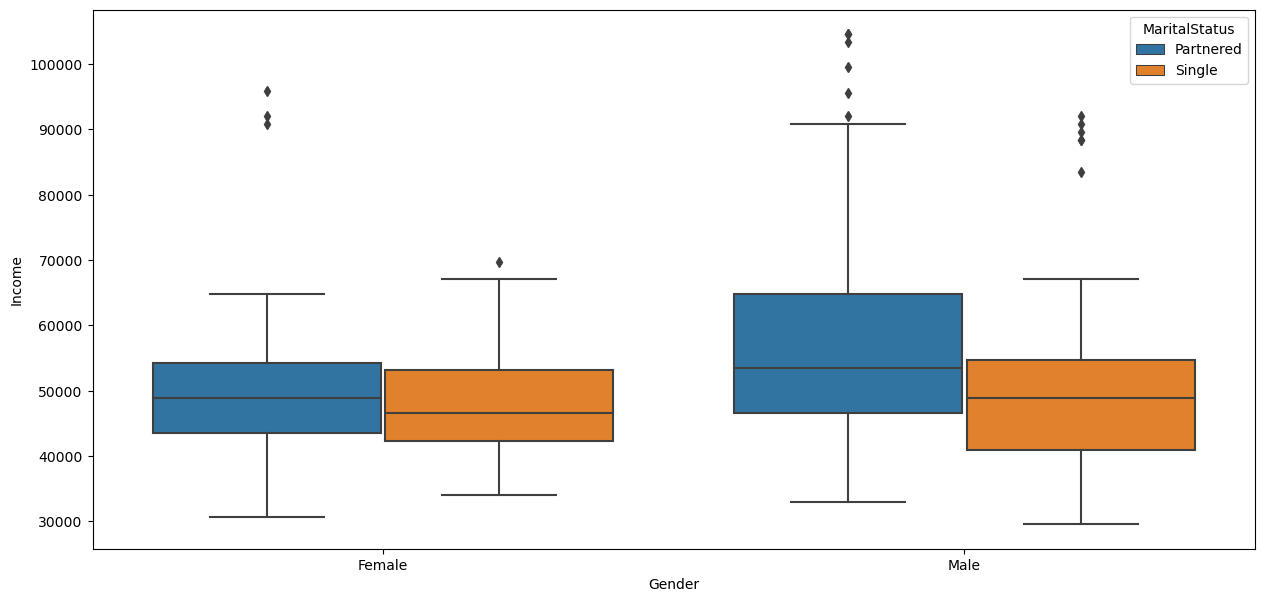

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio, x=cardio["Gender"], y=cardio["Income"], hue=cardio["MaritalStatus"]);
plt.show()

#### Observations: 
* There are several outliers in the data for single and partnered males. 
* Partnered males have a longer range for income compared to single males which is between 31,000 and 90,000.
* The distribution for partnered males based on income is right skewed. 
* 50% of partnered males income falls between 49,000 and 64,000
* 50% of single males income falls between 41,000 and 55,000
* The income range for single females is between 33,000 and 68,000, while partnered females range is between 30,000 and 66,000.

#### **Gender vs Income vs Education**

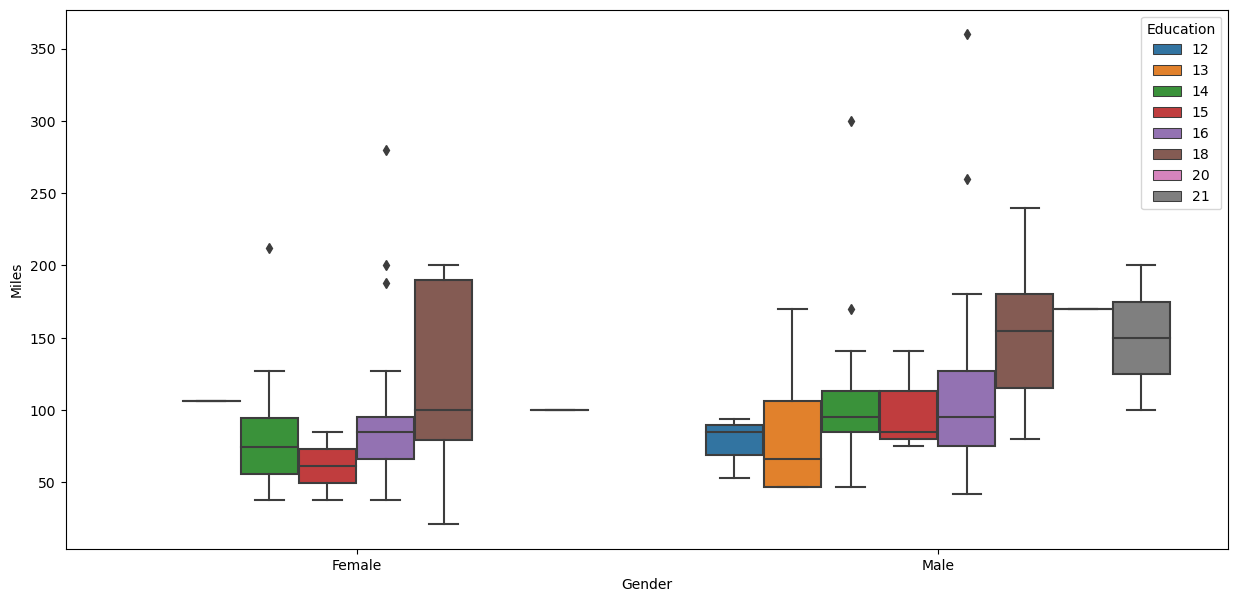

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio, x=cardio["Gender"], y=cardio["Miles"], hue=cardio["Education"]);
plt.show()

#### Observations: 
* Males with 18 years of education has the highest expected miles to run out of all males.
* Females with 18 years of education has the highest expected miles to run out of all females.
* Females with 18 years of education expected to run between 75 and 175 miles. 
* Females that have 12, 13, 20, and 21 years of education didn't expect to run any miles at all. 

#### **Age vs Income vs Product**

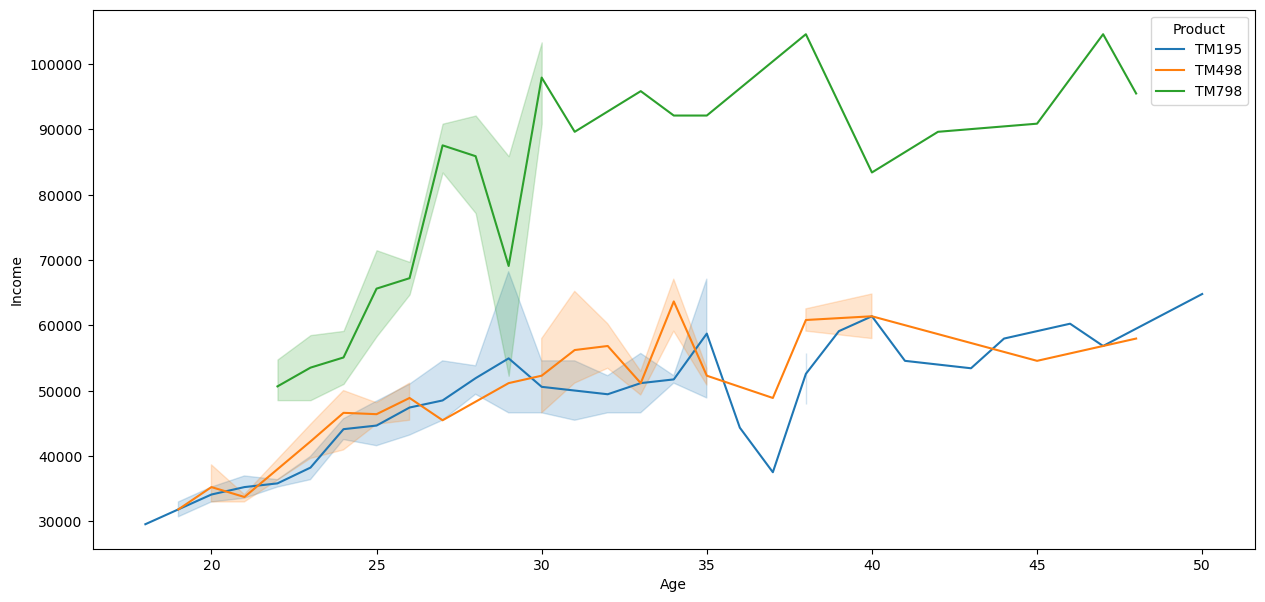

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Income"],hue=cardio["Product"])
plt.show()

#### Observations: 
* There's positive correlation between age and income for all products.
* Customers who purchased a TM798 income increases as they get older. 
* Customers who purchased a TM798 have the highest income, whil customers who purchased the TM195 or TM498 have almost identical income. 

#### **Age vs Miles vs Gender**

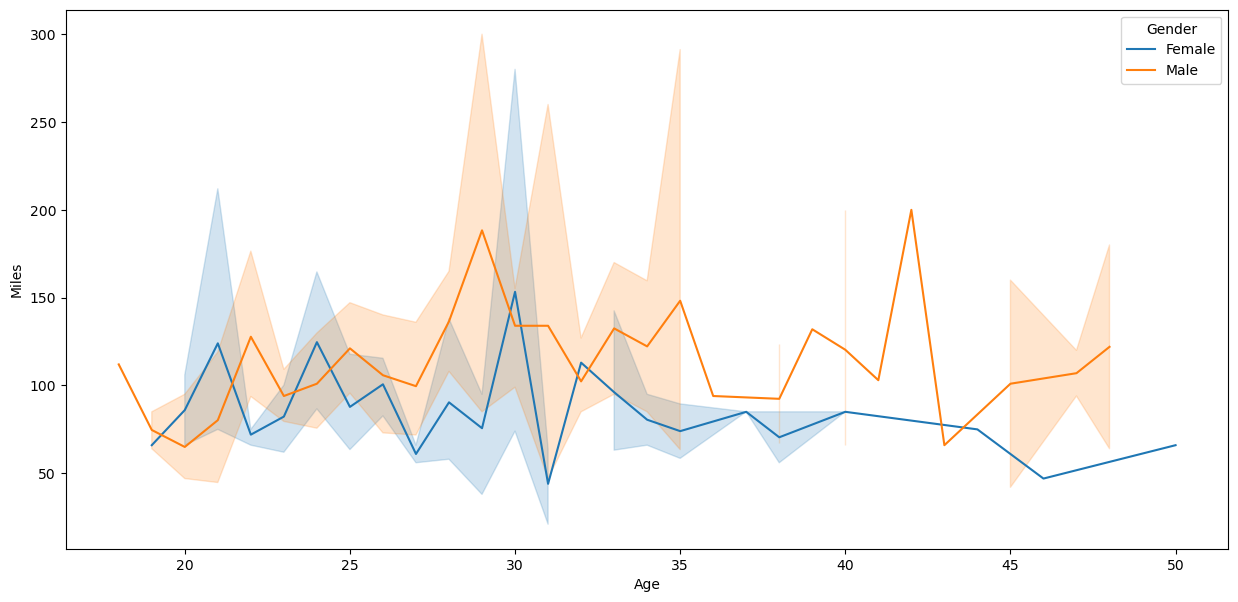

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["Gender"])
plt.show()

#### Observations: 
* We observe a decreasing trend for females as they get older they expect to run less miles.
* There's negative correlation between age and miles for females. 
* For males there's an increasing trend for expected miles to run from ages 18 to 43. After 43 there's a decrease in expected miles to run by males. 

#### **Age vs Miles vs Marital Status**

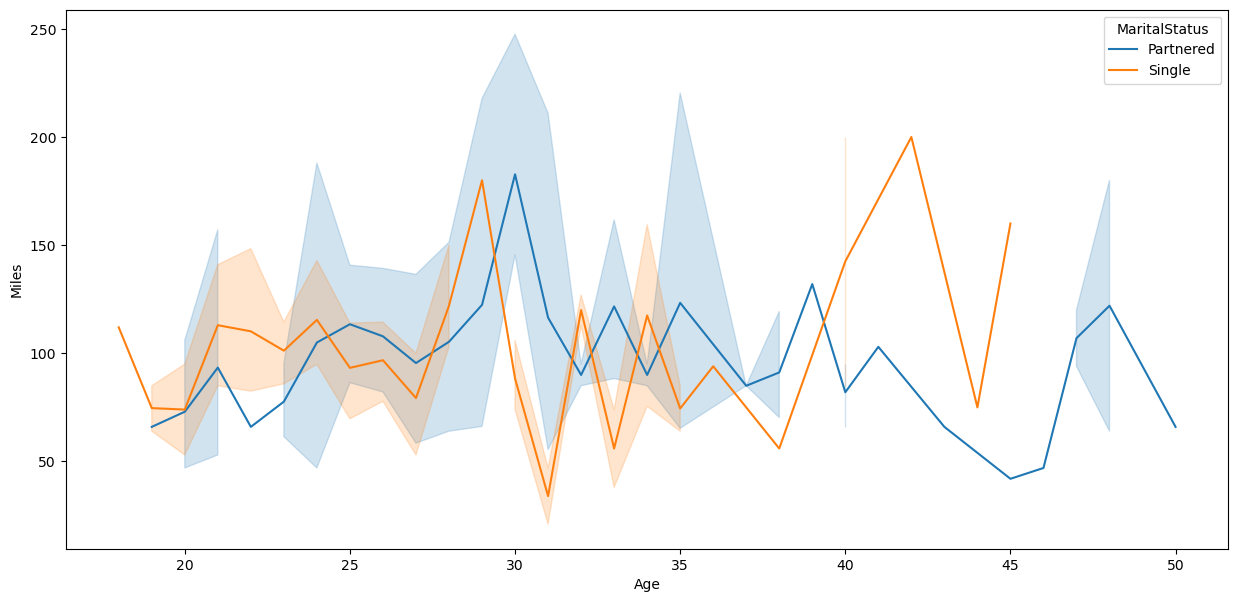

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["MaritalStatus"])
plt.show()

#### Observations: 
* There's an increasing trend for single customers as they get older for expected miles to run
* There's an decreasing trend for partnered customers as they get older for expected miles to run
* The expected miles to run by a customer is dependent on the customers age.

### **Question 8:** Group the data for each product to build customer profiles and summarize the key characteristics of the customers based on the statistical summary.  [3 marks]

In [42]:
cardio[cardio["Product"]=="TM195"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


* Customers who purchased a TM195 were mostly in a partnered relationship.
* Customers who purchased a TM195 were spread equally between males and females.
* On average customers who were 28 years old purchased TM195 products.
* On average customers who purchased a TM195 had 15 years of education.
* On average customers who had a fitness rating of 3 purchased TM195 products.
* On average customers who bought a TM195 expected to run 83 miles. 
* On average customer expected to use the TM195 3 times per week. 
* On average customers who purchased a TM195 had a income of 46,418.
* The max miles customers expected to run with the TM195 is 188 miles while the minimum is 38 miles. 
* The max income for customers who purchased a TM195 is 68,220 while the minimum is 29,562. 
* The max fitness rating for customers who purchased a TM195 is 5. 

In [43]:
cardio[cardio["Product"]=="TM498"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


* Males and females nearly purchased the same amount of TM498 products.
* Customers who were in a partnered relationship purchased more TM498 products compared to single customers.
* The average age of customers who purchased TM498 was 29 years old. 
* The average fitness rating of customers who purchased TM498 products was 3.
* The average usage for customers who purchased TM498 products was 3. 
* On average customers who purchased a TM498 had an income of 48,973. 
* The max miles customers expected to run with a TM498 is 212 miles, while the minimum is 21 miles.
* The max income for customers who purchased TM498 is 67,083 while the minimum is 31,836. 
* The max fitness rating for a customer who purchased TM498 products is 4. 

In [44]:
cardio[cardio["Product"]=="TM798"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


* Partnered customers purchased more TM798 products than single customers.
* Male customers purchased signficantly more TM798 products compared to females.
* On average the income for customers who purchased TM798 is 75,441.
* On average the fitness rating for customer who purhcased TM798 is 4.6
* On average the weekly usage for customers who purchased the TM798 is 4.7
* On average the miles expected to run for customers who purchased the TM798 is 166. 
* The max miles customers expected to run with a TM798 is 360 while the minimum is 80.
* The max income for customers who purchased a TM798 is 104,581 while the minimum is 48,556. 
* The max fitness rating for customers who purchased a TM798 is 5. 

### **Question 9:** Summarize the key characteristics of each product based on the analysis performed. What recommendations would you like to share to help improve the business? [6 marks]

#### **Conclusion:**

* We can conclude that the TM195 was the most frequent purchased product by customers with an average or below average income, and who has an average usage and fitness rating. 
* The TM798 was the least purchased product by customers with an above average income and above average usage/fitness rating. 
* The reason customers who purchased a TM798 had high fitness ratings is because their usage and expected miles to run was also high. 
* The TM498 was purchased by customers with an slightly below average income and average usage. 
* Customers who have a partner purchased more products compared to single customers. 

#### **Recommendations:**

* Single customers bought the least amount of products, we should develop a marketing campaign that convinces single customers that by working out more they can attract a partner, which can potentially increase sales for single customers. 
* Since the TM195 is the most frequent purchased product by partnered customers I recommend to continue to run targeted marketing campaigns using the TM195 for prospects that have a partner.
* Before a customer purchases a product we should create a survey based on the key characteristics that we've gathered to determine which product is the best fit for a customer.